<a href="https://colab.research.google.com/github/uday-12345678/Customer-churn-analysis/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving customer_churn.xlsx to customer_churn.xlsx


In [4]:
import pandas as pd

excel_file = 'customer_churn.xlsx'
sheets = pd.read_excel(excel_file, sheet_name=None)
sheets.keys()


dict_keys(['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status'])

In [7]:
customers = sheets['Customer_Demographics']         # no space
transactions = sheets['Transaction_History']     # trailing space
services = sheets['Customer_Service']             # leading space
interactions = sheets['Online_Activity']
churn=sheets['Churn_Status']     # exact match


In [10]:
# Clean keys for safer access
clean_sheets = {k.strip(): v for k, v in sheets.items()}
customers = clean_sheets['Customer_Demographics']         # no space
transactions = clean_sheets['Transaction_History']     # trailing space
services = clean_sheets['Customer_Service']             # leading space
interactions = clean_sheets['Online_Activity']
churn=clean_sheets['Churn_Status']


In [13]:
print("Customers columns:", customers.columns.tolist())
print("Transactions columns:", transactions.columns.tolist())
print("Services columns:", services.columns.tolist())
print("Interactions columns:", interactions.columns.tolist())
print("churn columns:",churn.columns.tolist())



Customers columns: ['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel']
Transactions columns: ['CustomerID', 'TransactionID', 'TransactionDate', 'AmountSpent', 'ProductCategory']
Services columns: ['CustomerID', 'InteractionID', 'InteractionDate', 'InteractionType', 'ResolutionStatus']
Interactions columns: ['CustomerID', 'LastLoginDate', 'LoginFrequency', 'ServiceUsage']
churn columns: ['CustomerID', 'ChurnStatus']


In [14]:
# Strip whitespaces and lowercase column names
for df in [customers, transactions, services, interactions,churn]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check standardized column names
print("Customers:", customers.columns)


Customers: Index(['customerid', 'age', 'gender', 'maritalstatus', 'incomelevel'], dtype='object')


In [17]:
df = customers.merge(transactions, on='customerid', how='left')\
              .merge(services, on='customerid', how='left')\
              .merge(interactions, on='customerid', how='left')\
              .merge(churn, on='customerid', how='left')


In [18]:
print("Shape of dataset:", df.shape)
df.info()
df.describe()


Shape of dataset: (6812, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        6812 non-null   int64         
 1   age               6812 non-null   int64         
 2   gender            6812 non-null   object        
 3   maritalstatus     6812 non-null   object        
 4   incomelevel       6812 non-null   object        
 5   transactionid     6812 non-null   int64         
 6   transactiondate   6812 non-null   datetime64[ns]
 7   amountspent       6812 non-null   float64       
 8   productcategory   6812 non-null   object        
 9   interactionid     5204 non-null   float64       
 10  interactiondate   5204 non-null   datetime64[ns]
 11  interactiontype   5204 non-null   object        
 12  resolutionstatus  5204 non-null   object        
 13  lastlogindate     6812 non-null   datetime64[ns]


,customerid,age,transactionid,transactiondate,amountspent,interactionid,interactiondate,lastlogindate,loginfrequency,churnstatus
count,6812.000000,6812.000000,6812.000000,6812,6812.000000,5204.000000,5204,6812,6812.000000,6812.000000
mean,500.169260,43.274516,5497.323253,2022-07-01 02:11:29.136817408,251.620527,5921.861261,2022-07-01 16:31:10.561106944,2023-07-06 04:56:47.633587712,25.724310,0.198473
min,1.000000,18.000000,1000.000000,2022-01-01 00:00:00,5.180000,2015.000000,2022-01-01 00:00:00,2023-01-01 00:00:00,1.000000,0.000000
25%,247.000000,30.000000,3223.500000,2022-04-02 00:00:00,127.100000,3873.250000,2022-04-07 00:00:00,2023-04-12 00:00:00,14.000000,0.000000
50%,505.500000,44.000000,5515.000000,2022-07-01 00:00:00,251.845000,5903.000000,2022-07-02 00:00:00,2023-07-13 00:00:00,26.000000,0.000000
75%,750.000000,56.000000,7675.250000,2022-09-30 00:00:00,375.280000,7851.000000,2022-09-25 00:00:00,2023-10-01 00:00:00,38.000000,0.000000
max,1000.000000,69.000000,9997.000000,2022-12-31 00:00:00,499.860000,9997.000000,2022-12-30 00:00:00,2023-12-31 00:00:00,49.000000,1.000000
std,286.704642,15.286788,2584.768541,NaN,142.901693,2332.331260,NaN,NaN,14.062032,0.398880


<Axes: >

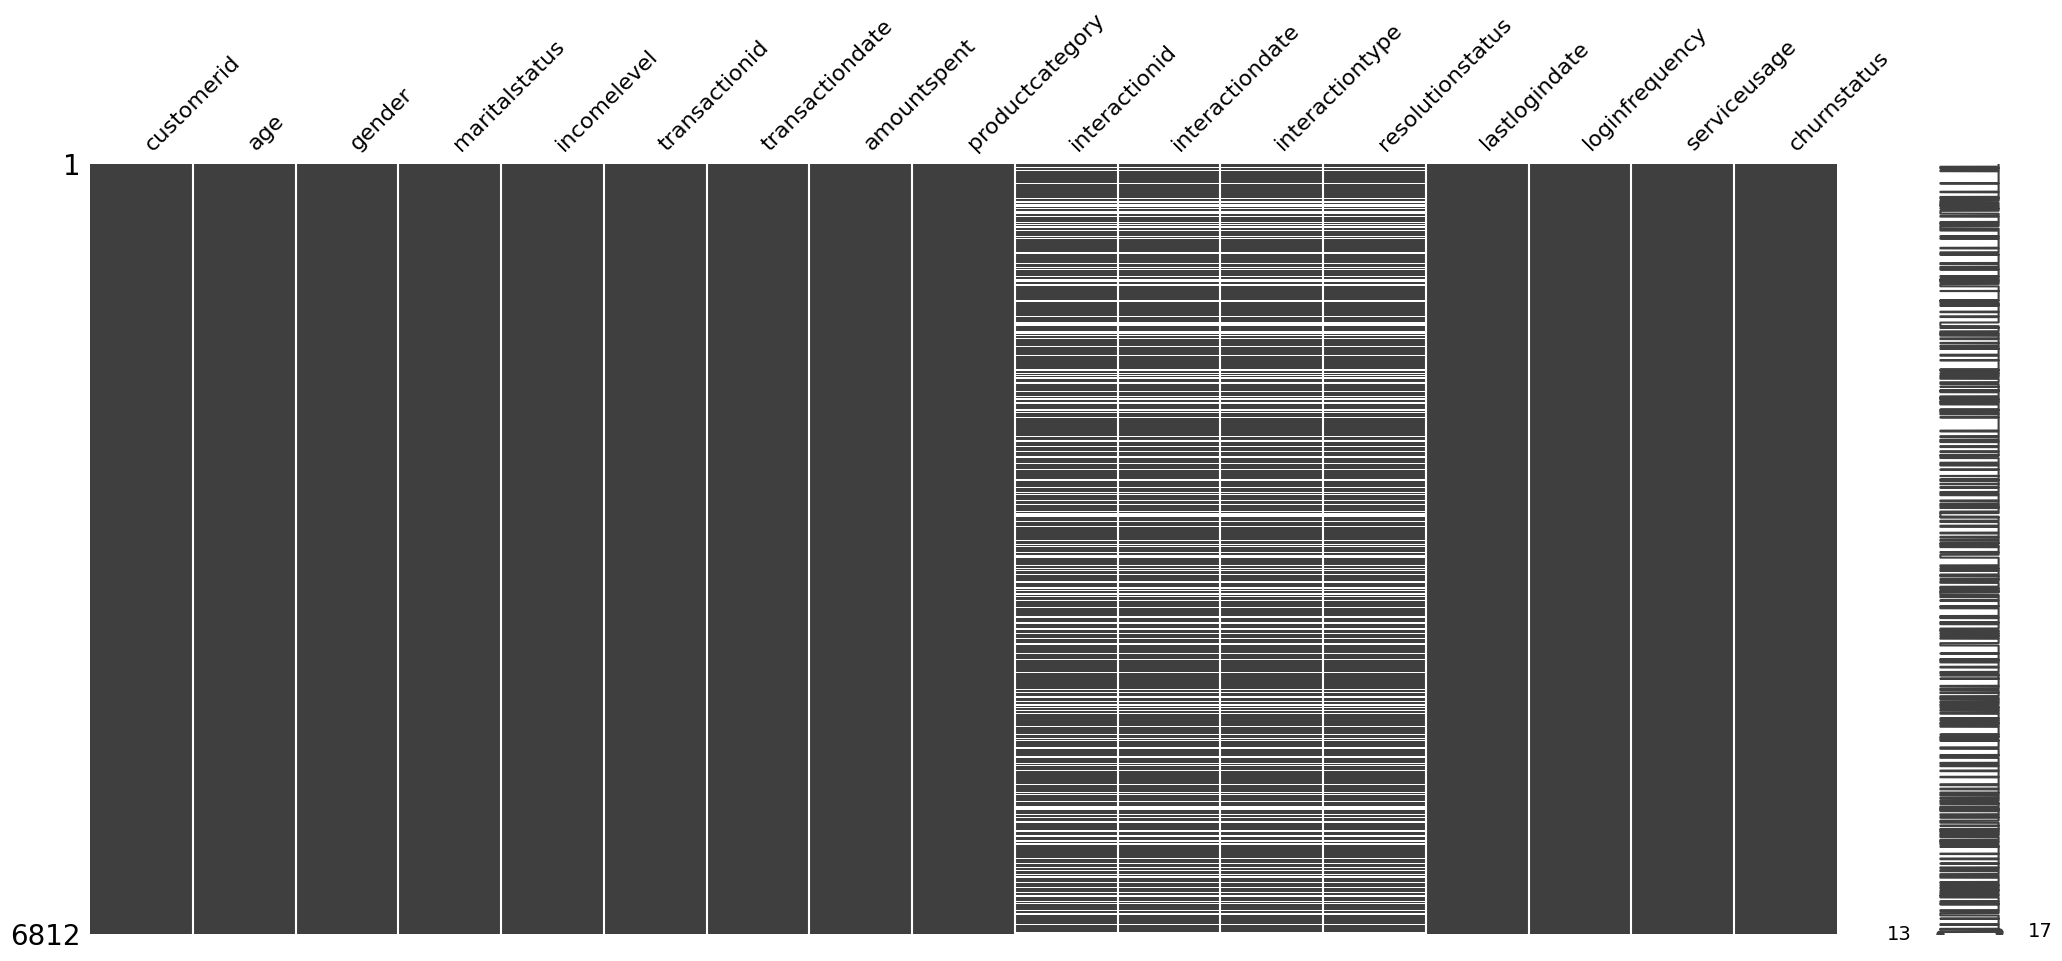

In [19]:
import missingno as msno
df.isnull().sum()
msno.matrix(df)


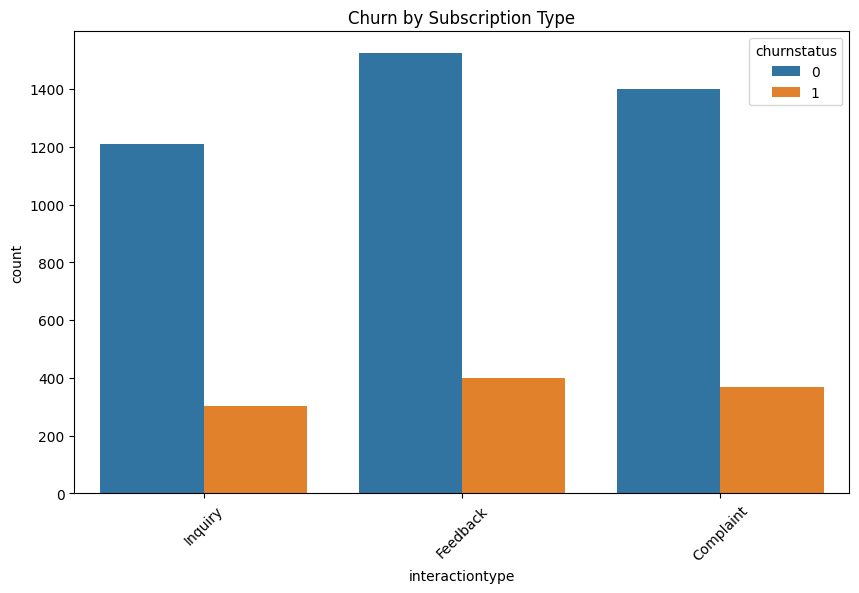

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='interactiontype', hue='churnstatus')
plt.title("Churn by Subscription Type")
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='age', ylabel='Count'>

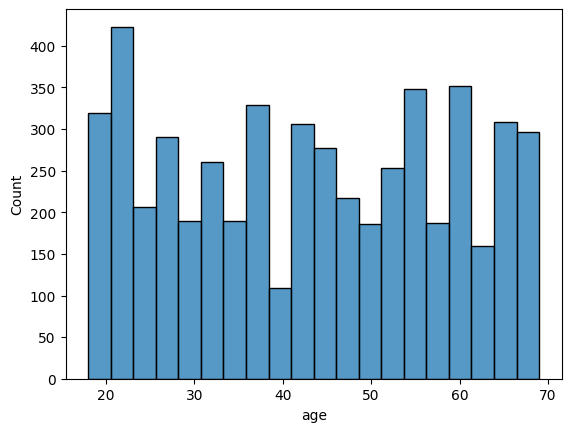

In [33]:
sns.histplot(df['age'], bins=20)


In [20]:
df = df.drop_duplicates()


In [21]:
df.select_dtypes(include='object').columns


Index(['gender', 'maritalstatus', 'incomelevel', 'productcategory',
       'interactiontype', 'resolutionstatus', 'serviceusage'],
      dtype='object')

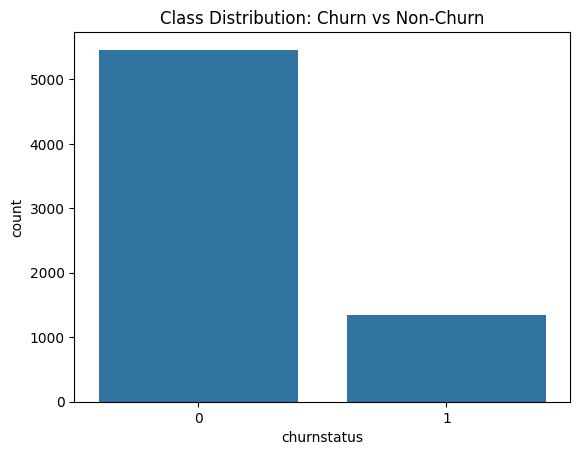

,proportion
churnstatus,
0,0.801527
1,0.198473


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churnstatus', data=df)
plt.title("Class Distribution: Churn vs Non-Churn")
plt.show()

df['churnstatus'].value_counts(normalize=True)


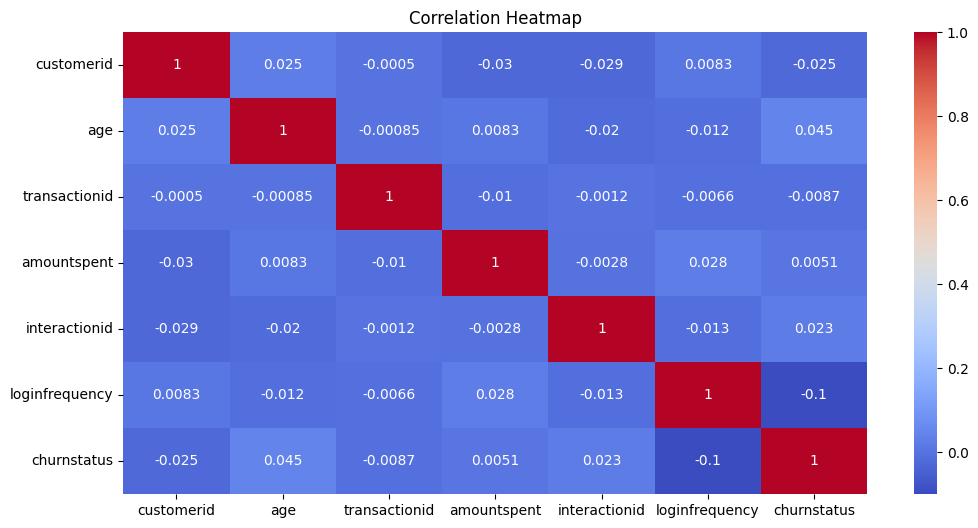

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


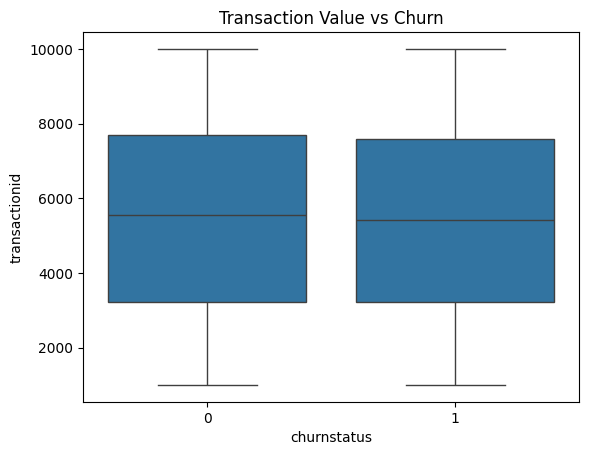

In [26]:
sns.boxplot(data=df, x='churnstatus', y='transactionid')
plt.title("Transaction Value vs Churn")
plt.show()


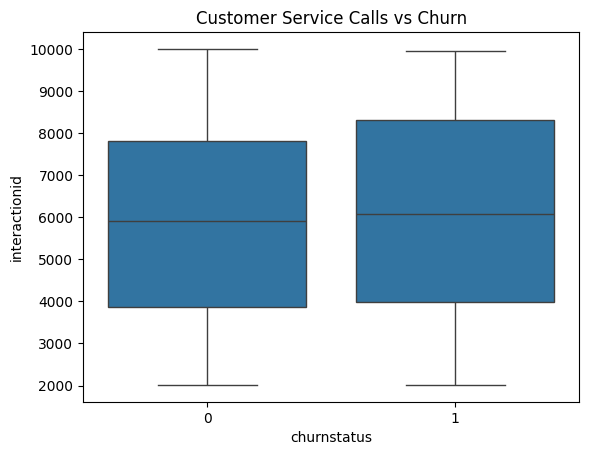

In [27]:
sns.boxplot(data=df, x='churnstatus', y='interactionid')
plt.title("Customer Service Calls vs Churn")
plt.show()


In [28]:
df['transactionid'].fillna(df['transactionid'].median(), inplace=True)


/tmp/ipython-input-28-3821166432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transactionid'].fillna(df['transactionid'].median(), inplace=True)


In [29]:
df.dropna(inplace=True)


In [30]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [31]:
df_encoded.to_csv("cleaned_customer_churn.csv", index=False)


In [32]:
from google.colab import files
files.download('cleaned_customer_churn.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Make a copy of your merged dataframe
df_encoded = df.copy()

# Encode all object (categorical) columns using LabelEncoder
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Check if 'churn' column is present and numeric
print("Target column type:", df_encoded['churnstatus'].dtype)

# Split into features and target
X = df_encoded.drop(columns=['churnstatus'])
y = df_encoded['churnstatus']

# Train-test split with stratification to preserve churn ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Target column type: int64
Train shape: (4163, 16)
Test shape: (1041, 16)


In [37]:
# Check for datetime columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns
print("Datetime Columns:", datetime_cols)

# Option 1: Drop all datetime columns (if not useful)
df_model = df.drop(columns=datetime_cols)

# Option 2 (optional): If you want to extract features instead of dropping:
# for col in datetime_cols:
#     df[col + '_year'] = df[col].dt.year
#     df[col + '_month'] = df[col].dt.month
#     df[col + '_day'] = df[col].dt.day
# df_model = df.drop(columns=datetime_cols)  # Drop original datetime columns


Datetime Columns: Index(['transactiondate', 'interactiondate', 'lastlogindate'], dtype='object')


In [39]:
# Separate features and target
X = df_model.drop(columns='churnstatus')  # or your actual target column name
y = df_model['churnstatus']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       826
           1       1.00      0.93      0.97       215

    accuracy                           0.99      1041
   macro avg       0.99      0.97      0.98      1041
weighted avg       0.99      0.99      0.99      1041



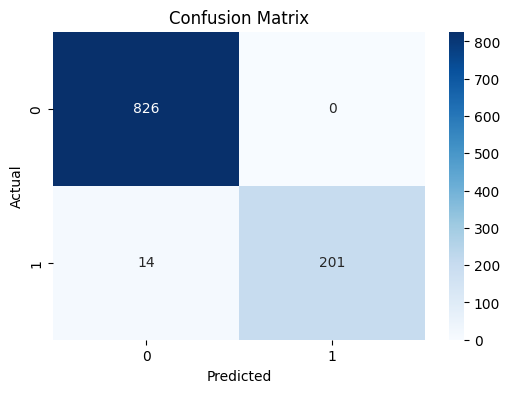

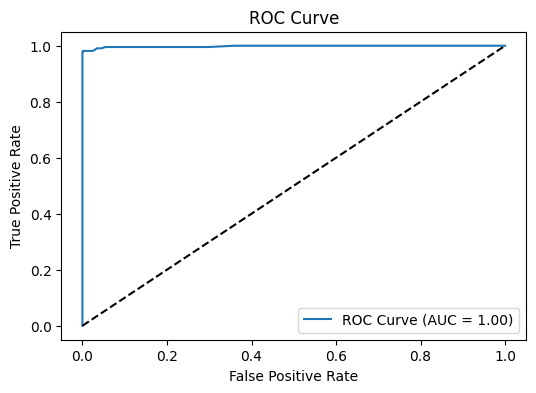

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Important for imbalanced data
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Only try 10 combinations
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model and performance
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       826
           1       1.00      0.93      0.96       215

    accuracy                           0.99      1041
   macro avg       0.99      0.97      0.98      1041
weighted avg       0.99      0.99      0.99      1041

ROC AUC Score: 0.9968860859282617


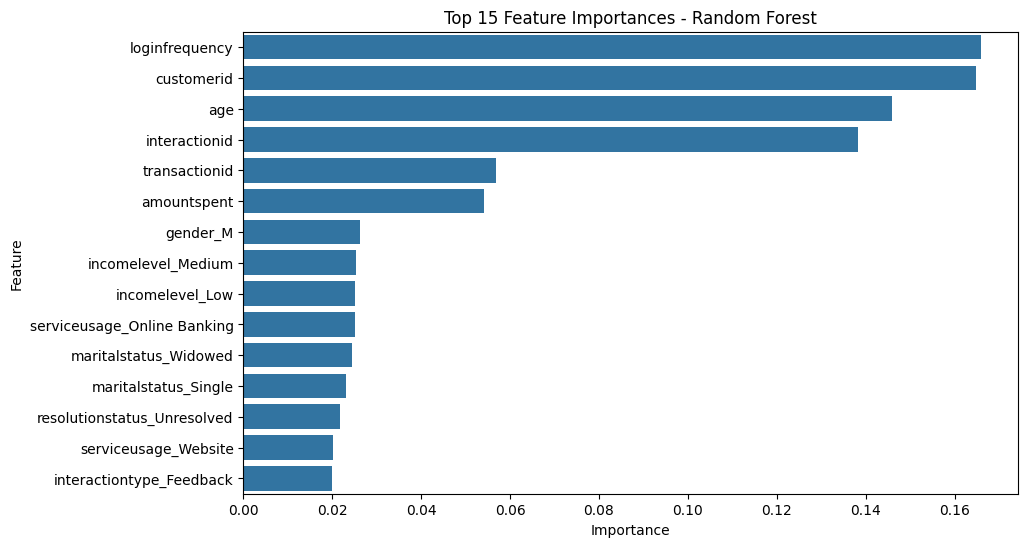

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1][:15]  # Top 15

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
